In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [3]:
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

In [4]:
import torch.nn as nn 
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 11)
        self.lin2 = nn.Linear(11, output_dim,bias=False)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.tanh(x)
        x = self.lin2(x)
        # x = F.tanh(x)
        return x

model_tanH = XOR()
print(model_tanH)
from torchsummary import summary
summary(model_tanH, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=11, bias=True)
  (lin2): Linear(in_features=11, out_features=1, bias=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 2, 11]              33
            Linear-2                 [-1, 2, 1]              11
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [5]:
import torch.nn as nn 
class XOR_new(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR_new, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.sigmoid=nn.Sigmoid()
        self.lin2 = nn.Linear(2, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        sig=self.sigmoid(x)
        yh = self.lin2(sig)
        return yh
model_sigmoid = XOR_new()
print(model_sigmoid)
from torchsummary import summary
summary(model_sigmoid, (2,2))

XOR_new(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (sigmoid): Sigmoid()
  (lin2): Linear(in_features=2, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 2]               6
           Sigmoid-2                 [-1, 2, 2]               0
            Linear-3                 [-1, 2, 1]               3
Total params: 9
Trainable params: 9
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [6]:
epochs = 2001
mseloss = nn.L1Loss()
model= model_tanH
optimizer = torch.optim.Adam(model.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50

for epoch in range(epochs):

  # input training example and return the prediction
  yhat = model.forward(X)

  # calculate MSE loss
  loss = mseloss(yhat, Y)
  
  # backpropogate through the loss gradiants
  loss.backward()

  # update model weights
  optimizer.step()

  # remove current gradients for next iteration
  optimizer.zero_grad()

  # append to loss
  current_loss += loss
  if epoch % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0
  
  # print progress
  if epoch % 500 == 0:
    print(f'Epoch: {epoch} completed')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0 completed
Epoch: 500 completed
Epoch: 1000 completed
Epoch: 1500 completed
Epoch: 2000 completed


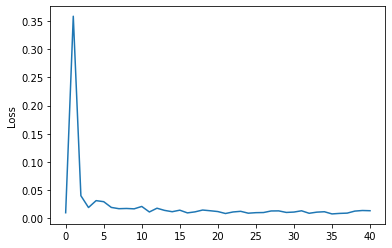

In [7]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

In [8]:
# show weights and bias
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

lin1.weight tensor([[-5.2772e-04, -1.4057e-03],
        [-3.9559e-02, -4.6796e-02],
        [-8.3675e-03, -3.1884e-02],
        [-1.1089e-07, -5.8259e-08],
        [-2.2527e+00, -1.8963e+00],
        [ 2.8409e-01,  6.0969e-01],
        [ 8.8980e-12, -1.9587e-11],
        [ 2.5754e-01,  5.5714e-01],
        [-1.4035e+00, -9.4239e-01],
        [-2.3906e+00,  1.3579e+00],
        [-1.1876e+00,  2.1739e+00]])
lin1.bias tensor([ 9.6550e-04,  4.3152e-02,  1.4389e-02,  8.6693e-08, -2.1803e-01,
        -5.1748e-01,  5.1061e-12, -4.6264e-01, -1.1430e+00, -6.9032e-01,
         3.3150e-01])
lin2.weight tensor([[-2.7231e-05, -4.2756e-04,  3.8405e-03, -2.1225e-09, -7.4238e-01,
         -6.2455e-02,  1.0766e-12, -3.7393e-02, -5.2153e-01,  7.0791e-01,
         -6.2972e-01]])


In [9]:
# test input
input = torch.tensor([1., 0.])
out = model(input)
print(out.round())

tensor([1.], grad_fn=<RoundBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [10]:
#should be redundant 
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [11]:
loss_func = nn.L1Loss()

In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)


In [13]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.4060080051422119, 
Epoch: 50, Loss: 0.38793277740478516, 


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 100, Loss: 0.09887230396270752, 
Epoch: 150, Loss: 0.30850839614868164, 
Epoch: 200, Loss: 0.11654996871948242, 
Epoch: 250, Loss: 0.1616257131099701, 
Epoch: 300, Loss: 0.6538232564926147, 
Epoch: 350, Loss: 0.41702044010162354, 
Epoch: 400, Loss: 0.30091750621795654, 
Epoch: 450, Loss: 0.04619207978248596, 
Epoch: 500, Loss: 0.3159656822681427, 
Epoch: 550, Loss: 0.024342982098460197, 
Epoch: 600, Loss: 0.1847330778837204, 
Epoch: 650, Loss: 0.017835693433880806, 
Epoch: 700, Loss: 0.22653913497924805, 
Epoch: 750, Loss: 0.08087413758039474, 
Epoch: 800, Loss: 0.6061033010482788, 
Epoch: 850, Loss: 0.16780459880828857, 
Epoch: 900, Loss: 0.1315239816904068, 
Epoch: 950, Loss: 0.06830447912216187, 
Epoch: 1000, Loss: 0.22580468654632568, 
Epoch: 1050, Loss: 0.44908028841018677, 
Epoch: 1100, Loss: 0.15085792541503906, 
Epoch: 1150, Loss: 0.3332095146179199, 
Epoch: 1200, Loss: 0.33586305379867554, 
Epoch: 1250, Loss: 0.08921867609024048, 
Epoch: 1300, Loss: 0.02267313003540039,

In [14]:
# test input
input = torch.tensor([1., 0.])
out = model(input)
print(out.round())

tensor([1.], grad_fn=<RoundBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


**Prateek and Phani's code  **

In [15]:
# XOR_method1 : Uses 3 Linear layers to get the total parameters 44, changed activations from "tanh" to "sigmoid", removed activation from last layer
class XOR_method1(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR_method1, self).__init__()
        self.lin1 = nn.Linear(input_dim, 5)
        self.lin2 = nn.Linear(5, 4)
        self.lin3 = nn.Linear(4, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)      # Changed activation from tanh to sigmoid for better predictions
        x = self.lin2(x)
        x = F.sigmoid(x)
        x = self.lin3(x)
        return x

# Model Summary for XOR_Method1
model_1 = XOR_method1()
print(model_1)
from torchsummary import summary
summary(model_1, (2,2))

XOR_method1(
  (lin1): Linear(in_features=2, out_features=5, bias=True)
  (lin2): Linear(in_features=5, out_features=4, bias=True)
  (lin3): Linear(in_features=4, out_features=1, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 5]              15
            Linear-2                 [-1, 2, 4]              24
            Linear-3                 [-1, 2, 1]               5
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [16]:
# XOR_method2 : Uses 2 Linear layers to get the total parameters 44, changed activations from "tanh" to "sigmoid", removed activation from last layer
class XOR_method2(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR_method2, self).__init__()
        self.lin1 = nn.Linear(input_dim, 11)
        self.lin2 = nn.Linear(11, output_dim, bias = False)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)      # Changed activation from tanh to sigmoid for better predictions
        x = self.lin2(x)
        return x
## Model Summary for XOR_Method2
model_2 = XOR_method2()
print(model_2)
from torchsummary import summary
summary(model_2, (2,2))

XOR_method2(
  (lin1): Linear(in_features=2, out_features=11, bias=True)
  (lin2): Linear(in_features=11, out_features=1, bias=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 2, 11]              33
            Linear-2                 [-1, 2, 1]              11
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [17]:
class XOR_method3(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR_method3, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, 2)
        self.lin3 = nn.Linear(2, 2)
        self.lin4 = nn.Linear(2, 2)
        self.lin5 = nn.Linear(2, 2)
        self.lin6 = nn.Linear(2, 2)
        self.lin7 = nn.Linear(2, 2)
        self.lin8 = nn.Linear(2, 2)
        

        self.lin9 = nn.Linear(2, output_dim, bias = False)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)      # Changed activation from tanh to sigmoid for better predictions
        x = self.lin3(x)
        x = F.sigmoid(x)      # Changed activation from tanh to sigmoid for better predictions
        x = self.lin4(x)
        x = F.sigmoid(x)      # Changed activation from tanh to sigmoid for better predictions
        x = self.lin5(x)
        x = F.sigmoid(x)      # Changed activation from tanh to sigmoid for better predictions
        x = self.lin6(x)
        x = F.sigmoid(x)
        x = self.lin7(x)
        x = F.sigmoid(x)
        x = self.lin8(x)
        x = F.sigmoid(x)
       
        x = self.lin9(x)
        
    
        return x


# Model Summary for XOR_Method3
model_3 = XOR_method3()
print(model_3)
from torchsummary import summary
summary(model_3, (2,2))

XOR_method3(
  (lin1): Linear(in_features=2, out_features=2, bias=True)
  (lin2): Linear(in_features=2, out_features=2, bias=True)
  (lin3): Linear(in_features=2, out_features=2, bias=True)
  (lin4): Linear(in_features=2, out_features=2, bias=True)
  (lin5): Linear(in_features=2, out_features=2, bias=True)
  (lin6): Linear(in_features=2, out_features=2, bias=True)
  (lin7): Linear(in_features=2, out_features=2, bias=True)
  (lin8): Linear(in_features=2, out_features=2, bias=True)
  (lin9): Linear(in_features=2, out_features=1, bias=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 2]               6
            Linear-2                 [-1, 2, 2]               6
            Linear-3                 [-1, 2, 2]               6
            Linear-4                 [-1, 2, 2]               6
            Linear-5                 [-1, 2, 2]               6
    

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [18]:
#weight initialization for different models
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model_1)
weights_init(model_2)
weights_init(model_3)

In [19]:
loss_func = nn.MSELoss() #nn.L1Loss() # Modified loss function to get better predictions
# Modified optimizer from SGD to Adam 
optimizer_1 = optim.Adam(model_1.parameters(), lr=0.02) #optim.SGD(model_1.parameters(), lr=0.02, momentum=0.9)
optimizer_2 = optim.Adam(model_2.parameters(), lr=0.02) #optim.SGD(model_2.parameters(), lr=0.02, momentum=0.9)
optimizer_3 = optim.Adam(model_3.parameters(), lr=0.02) #optim.SGD(model_2.parameters(), lr=0.02, momentum=0.9)

In [20]:
#Function to plot the gradient flow for every model
def plot_grad_flow(named_parameters):
    ave_grads = []
    layers = []
    for n, p in named_parameters:
        if(p.requires_grad) and ("bias" not in n):
            layers.append(n)
            if p.grad == None:
              continue
            else:
              ave_grads.append(p.grad.abs().mean())
            
    plt.plot(ave_grads, alpha=0.3, color="b")
    plt.hlines(0, 0, len(ave_grads)+1, linewidth=1, color="k" )
    plt.xticks(range(0,len(ave_grads), 1), layers, rotation="vertical")
    plt.xlim(xmin=0, xmax=len(ave_grads))
    plt.xlabel("Layers")
    plt.ylabel("average gradient")
    plt.title("Gradient flow")
    plt.grid(True)
    return ave_grads

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, Loss_method1: 2.5933687686920166 
Epoch: 50, Loss_method1: 0.24227242171764374 
Epoch: 100, Loss_method1: 0.3096315860748291 
Epoch: 150, Loss_method1: 0.20351429283618927 
Epoch: 200, Loss_method1: 0.006113769020885229 
Epoch: 250, Loss_method1: 1.5663772501284257e-09 
Epoch: 300, Loss_method1: 1.4712586704490604e-10 
Epoch: 350, Loss_method1: 8.881784197001252e-14 
Epoch: 400, Loss_method1: 0.0 
Epoch: 450, Loss_method1: 3.552713678800501e-15 
Epoch: 500, Loss_method1: 3.552713678800501e-15 
Epoch: 550, Loss_method1: 0.0 
Epoch: 600, Loss_method1: 3.552713678800501e-15 
Epoch: 650, Loss_method1: 8.881784197001252e-16 
Epoch: 700, Loss_method1: 0.0 
Epoch: 750, Loss_method1: 0.0 
Epoch: 800, Loss_method1: 0.0 
Epoch: 850, Loss_method1: 0.0 
Epoch: 900, Loss_method1: 0.0 
Epoch: 950, Loss_method1: 0.0 
Epoch: 1000, Loss_method1: 0.0 
Epoch: 1050, Loss_method1: 0.0 
Epoch: 1100, Loss_method1: 0.0 
Epoch: 1150, Loss_method1: 0.0 
Epoch: 1200, Loss_method1: 0.0 
Epoch: 1250, Los

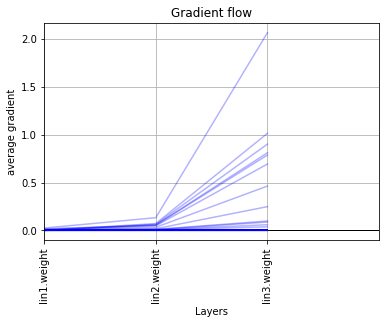

In [21]:
epochs = 2100          # Number of epochs changed to 2100
steps = X.size(0)
Loss_method1 = []
Loss_method2 = []
Loss_method3 = []


for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        ########### Training Method-1 Model ###################################
        optimizer_1.zero_grad()
        y_hat_1 = model_1(x_var)
        loss_1 = loss_func.forward(y_hat_1, y_var)
        loss_1.backward()
        if i% 100 == 0:
          plot_grad_flow(model_1.named_parameters())
        optimizer_1.step()

    
    ## Collecting losses separately for each method
    Loss_method1.append(loss_1) 
    

    # Printing out Loss values for every 50 epochs
    if i % 50 == 0:
        print( "Epoch: {0}, Loss_method1: {1} ".format(i, loss_1.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, Loss_method2: 0.7533052563667297 
Epoch: 50, Loss_method2: 0.03553415462374687 
Epoch: 100, Loss_method2: 0.012974229641258717 
Epoch: 150, Loss_method2: 2.8212232791702263e-05 
Epoch: 200, Loss_method2: 4.7356966348388596e-08 
Epoch: 250, Loss_method2: 2.751221472863108e-11 
Epoch: 300, Loss_method2: 7.72937269744034e-13 
Epoch: 350, Loss_method2: 3.552713678800501e-15 
Epoch: 400, Loss_method2: 5.684341886080802e-14 
Epoch: 450, Loss_method2: 5.684341886080802e-14 
Epoch: 500, Loss_method2: 0.0 
Epoch: 550, Loss_method2: 0.0 
Epoch: 600, Loss_method2: 0.0 
Epoch: 650, Loss_method2: 3.552713678800501e-15 
Epoch: 700, Loss_method2: 0.0 
Epoch: 750, Loss_method2: 1.4210854715202004e-14 
Epoch: 800, Loss_method2: 0.0 
Epoch: 850, Loss_method2: 8.881784197001252e-16 
Epoch: 900, Loss_method2: 3.552713678800501e-15 
Epoch: 950, Loss_method2: 0.0 
Epoch: 1000, Loss_method2: 1.4210854715202004e-14 
Epoch: 1050, Loss_method2: 0.0 
Epoch: 1100, Loss_method2: 7.035261262444692e-12 
Ep

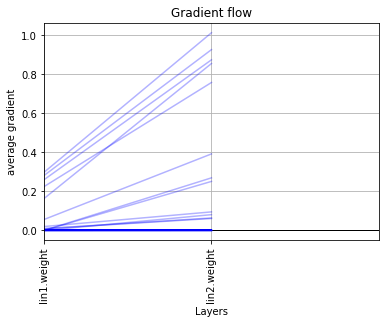

In [22]:
for i in range(epochs):
  for j in range(steps):
      data_point = np.random.randint(X.size(0))
      x_var = Variable(X[data_point], requires_grad=False)
      y_var = Variable(Y[data_point], requires_grad=False)

########### Training Method-2 Model ###################################
      optimizer_2.zero_grad()
      y_hat_2 = model_2(x_var)
      loss_2 = loss_func.forward(y_hat_2, y_var)
      loss_2.backward()
      if i% 100 == 0:
        plot_grad_flow(model_2.named_parameters())
      optimizer_2.step()   
  Loss_method2.append(loss_2)

# Printing out Loss values for every 50 epochs
  if i % 50 == 0:
    print( "Epoch: {0}, Loss_method2: {1} ".format(i, loss_2.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, Loss_method3: 0.8019593358039856 
Epoch: 50, Loss_method3: 0.24687737226486206 
Epoch: 100, Loss_method3: 0.12451840937137604 
Epoch: 150, Loss_method3: 0.1976800113916397 
Epoch: 200, Loss_method3: 0.2612050473690033 
Epoch: 250, Loss_method3: 0.17763453722000122 
Epoch: 300, Loss_method3: 0.2846819758415222 
Epoch: 350, Loss_method3: 0.09275628626346588 
Epoch: 400, Loss_method3: 0.31278955936431885 
Epoch: 450, Loss_method3: 0.2579317092895508 
Epoch: 500, Loss_method3: 0.20325545966625214 
Epoch: 550, Loss_method3: 0.16461659967899323 
Epoch: 600, Loss_method3: 0.33321744203567505 
Epoch: 650, Loss_method3: 0.33993926644325256 
Epoch: 700, Loss_method3: 0.2242451012134552 
Epoch: 750, Loss_method3: 0.280536413192749 
Epoch: 800, Loss_method3: 0.24290259182453156 
Epoch: 850, Loss_method3: 0.2831752300262451 
Epoch: 900, Loss_method3: 0.35159364342689514 
Epoch: 950, Loss_method3: 0.1868775188922882 
Epoch: 1000, Loss_method3: 0.221769317984581 
Epoch: 1050, Loss_method3: 

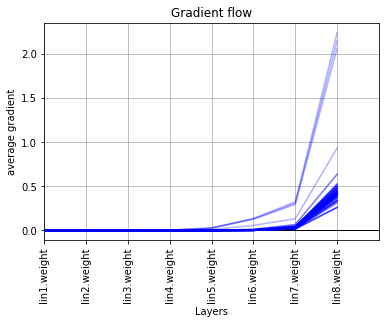

In [23]:
for i in range(epochs):
  for j in range(steps):
    data_point = np.random.randint(X.size(0))
    x_var = Variable(X[data_point], requires_grad=False)
    y_var = Variable(Y[data_point], requires_grad=False)

    ########### Training Method-3 Model ###################################
    optimizer_3.zero_grad()
    y_hat_3 = model_3(x_var)
    loss_3 = loss_func.forward(y_hat_3, y_var)
    loss_3.backward()
    if i% 100 == 0:
      plot_grad_flow(model_3.named_parameters())
    optimizer_3.step()

  Loss_method3.append(loss_3)
  
  # Printing out Loss values for every 50 epochs
  if i % 50 == 0:
    print( "Epoch: {0}, Loss_method3: {1} ".format(i, loss_3.data.numpy()))

Text(0, 0.5, 'Loss')

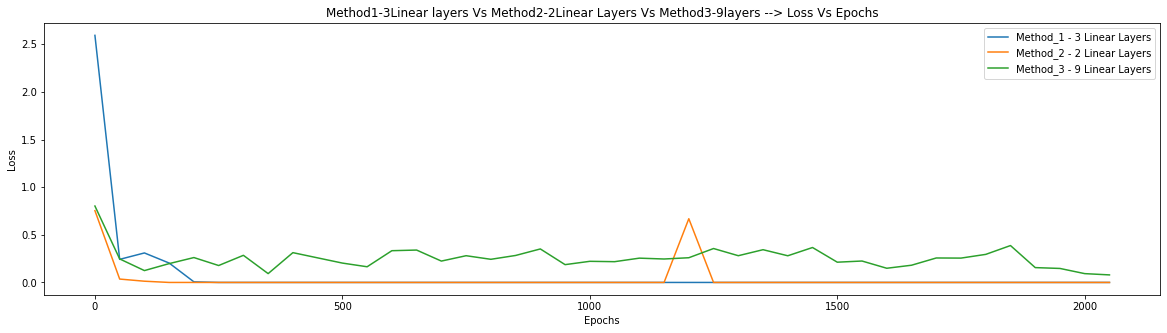

In [24]:
# Plotting - Loss Vs Epochs
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
plt.plot(range(0,2100,50), [x for x in Loss_method1[0::50]],label='Method_1 - 3 Linear Layers')
plt.plot(range(0,2100,50), [x for x in Loss_method2[0::50]],label='Method_2 - 2 Linear Layers')
plt.plot(range(0,2100,50), [x for x in Loss_method3[0::50]],label='Method_3 - 9 Linear Layers')
plt.legend()
plt.title("Method1-3Linear layers Vs Method2-2Linear Layers Vs Method3-9layers --> Loss Vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [25]:

### Predictions ##########################
y_hat_method1 = model_1(X)
y_hat_method2 = model_2(X)
y_hat_method3 = model_3(X)
y_hat_method1

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<AddmmBackward>)

In [26]:
# Final Predictions comparison
y_hat_method1_n,y_hat_method2_n,y_hat_method3_n,Y_actual = y_hat_method1.detach().cpu().numpy(),y_hat_method2.detach().cpu().numpy(),y_hat_method3.detach().cpu().numpy(), Y.detach().cpu().numpy() # Detaching to convert to array and send it to Dataframe

import pandas as pd
predictions_df = pd.DataFrame(data = [Y_actual.reshape(-1), y_hat_method1_n.reshape(-1),y_hat_method2_n.reshape(-1),y_hat_method3_n.reshape(-1)]).T
predictions_df.columns=['Y_Actual','Y_method1_predi','Y_method2_predi','Y_method3_predi']
predictions_df

,Y_Actual,Y_method1_predi,Y_method2_predi,Y_method3_predi
0,0.0,0.0,-1.192093e-07,-0.040615
1,1.0,1.0,9.999999e-01,0.570776
2,1.0,1.0,9.999999e-01,0.570776
3,0.0,0.0,2.384186e-07,0.570776


# ***
Conclusions

Tried out 3 different neural network architectures that meet the total parameter requirement of 44.
We have changed
A. optimizer from SGD to ADAM,
B. loss from L1 loss to MSE,
C. Activation function from tanh to Sigmoid.
D. Number of epochs from 300 to 2100.
E. Removed activation from the last layer of all the networks
Model 3 is having most number of layers (9), and observed vanishing gradient issue since for inner layers gradients are zero and but loss is high as well as predictions are bad.

Model 1 and Model 2 have better predictions.***